In [2]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



In [4]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Load dataset
df = pd.read_csv('your_dataset.csv')  
if 'short_description' not in df.columns or 'genre' not in df.columns or 'release_date' not in df.columns:
    raise ValueError("Dataset must contain 'short_description', 'genre', and 'release_date' columns")


In [6]:
# Preprocessing function
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    stopwordsset = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in tokens if word.isalnum() and word not in stopwordsset]
    return " ".join(words)



In [7]:
# Apply preprocessing
df['cleaned_description'] = df['short_description'].apply(preprocess_text)
# Sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df['cleaned_description'].apply(get_sentiment)

# Extract year from release_date
df['Year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year



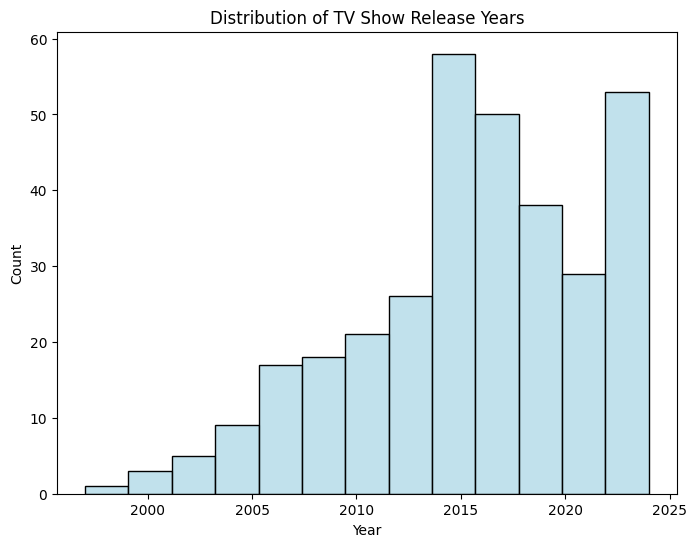

In [8]:
# Plot histogram of release years
plt.figure(figsize=(8, 6))
sns.histplot(df['Year'], kde=False, color="lightblue")
plt.title('Distribution of TV Show Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()



C:\Users\panka\AppData\Local\Temp\ipykernel_9864\3011265751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


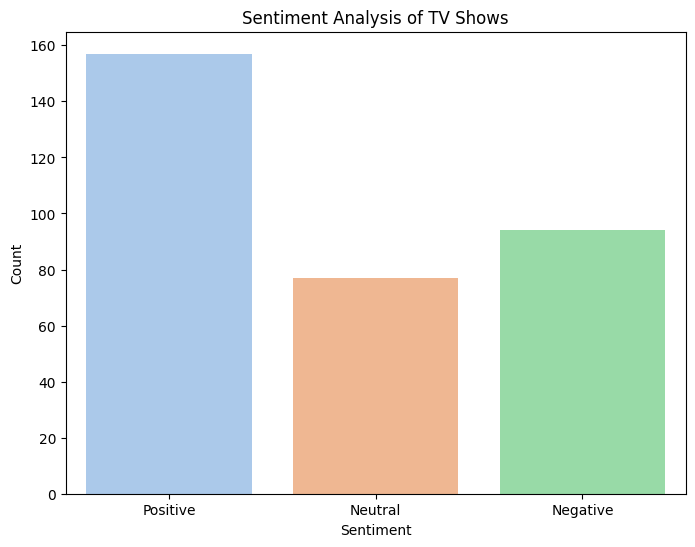

In [9]:
# Plot sentiment counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Sentiment Analysis of TV Shows')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


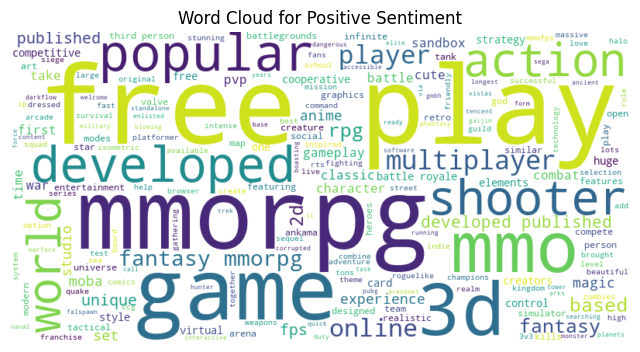

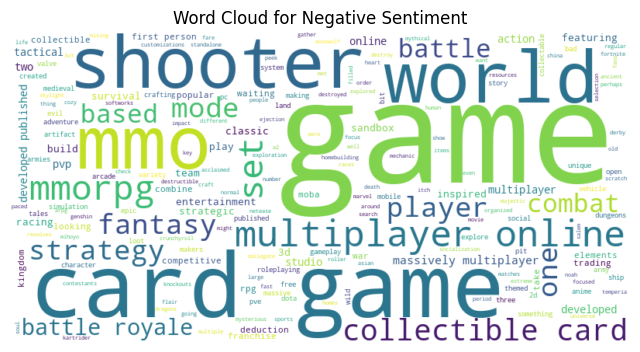

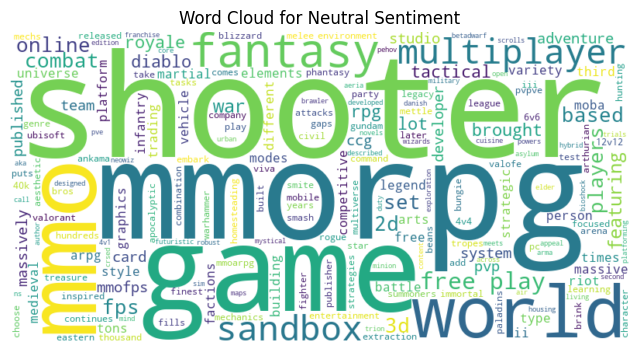

In [10]:
sentiments = ['Positive', 'Negative', 'Neutral']
for sentiment in sentiments:
    text = " ".join(df[df['sentiment'] == sentiment]['cleaned_description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()

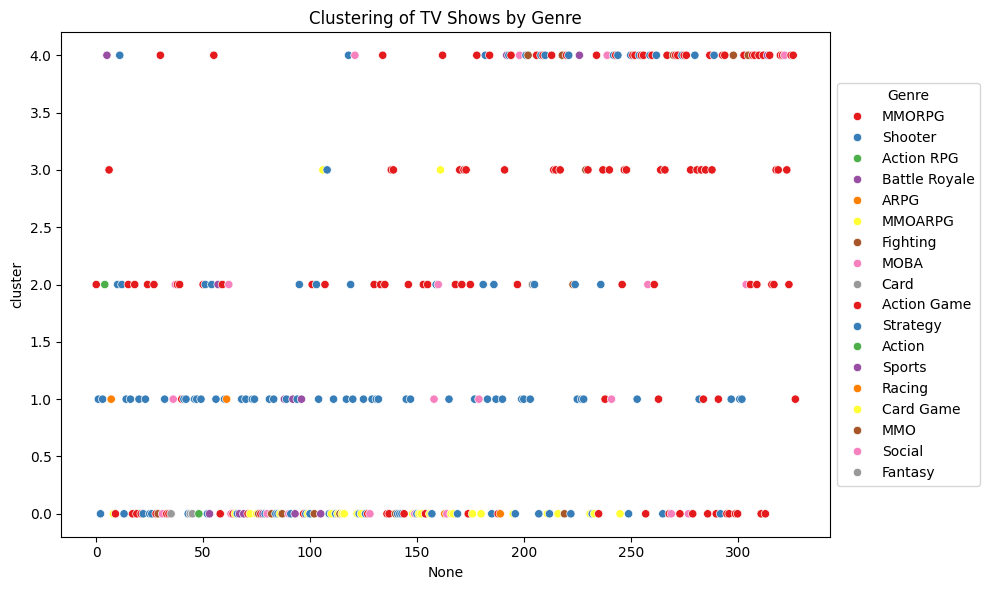

In [11]:

# Vectorize text for clustering
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_description'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['cluster'], hue=df['genre'], palette='Set1')
plt.title('Clustering of TV Shows by Genre')
plt.legend(title='Genre', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Topic 1:
game fantasy mmorpg world free players mmo unique arcade competitive

Topic 2:
play free mmorpg 3d players mmo world moba shooter action

Topic 3:
developed published shooter games fps game rpg tactical entertainment mmo

Topic 4:
game multiplayer play free shooter mmo online battle sandbox royale

Topic 5:
mmorpg game fantasy card 3d popular based online world combat



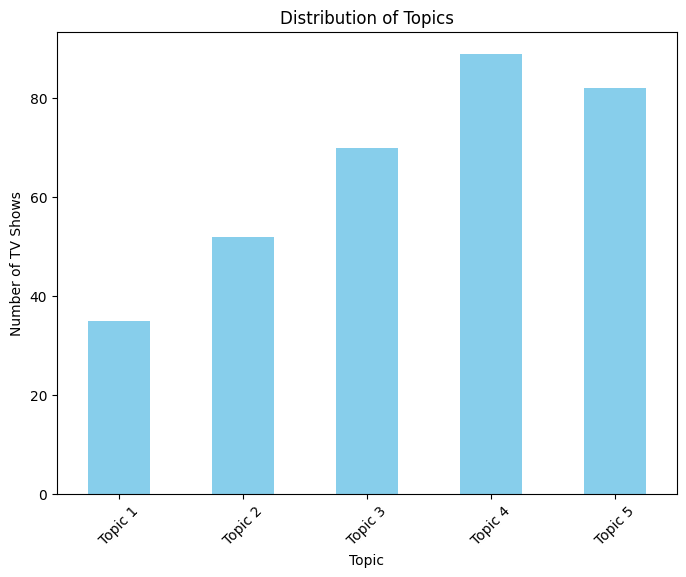

In [12]:

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_description'])
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)

feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()
n_top_words = 10
display_topics(lda, feature_names, n_top_words)

topic_values = lda.transform(dtm)
df['Dominant_Topic'] = topic_values.argmax(axis=1)

plt.figure(figsize=(8, 6))
df['Dominant_Topic'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Number of TV Shows')
plt.xticks(range(n_topics), [f"Topic {i+1}" for i in range(n_topics)], rotation=45)
plt.show()
